In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(data)

# Function to calculate Euclidean distance
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Manual K-Means clustering implementation
def kmeans_manual(data, k, max_iters=10):
    np.random.seed(42)
    centroids = data[np.random.choice(data.shape[0], k, replace = False)] # Randomly initialize centroids
    for iteration in range(max_iters):
        # Assign points to the nearest centroid
        clusters = {i: [] for i in range(k)}
        for point in data:
            distances = [calculate_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Update centroids
        new_centroids = np.array([np.mean(clusters[i], axis=0) if clusters[i] else centroids[i] for i in range(k)])

        # Stop if centroids do not change
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

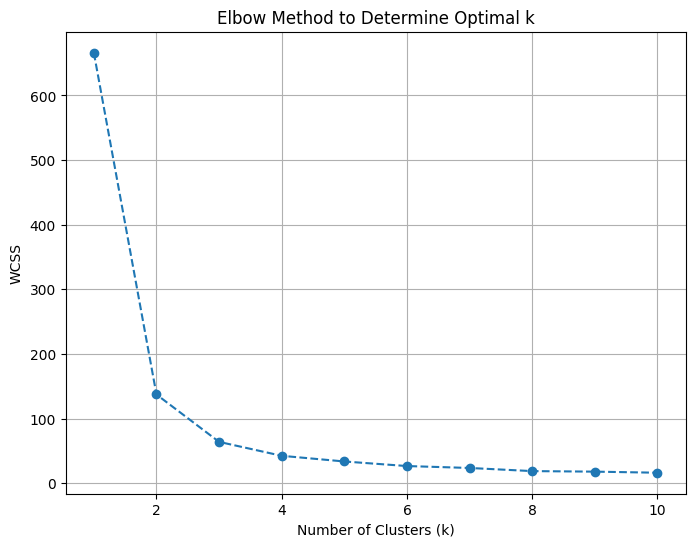

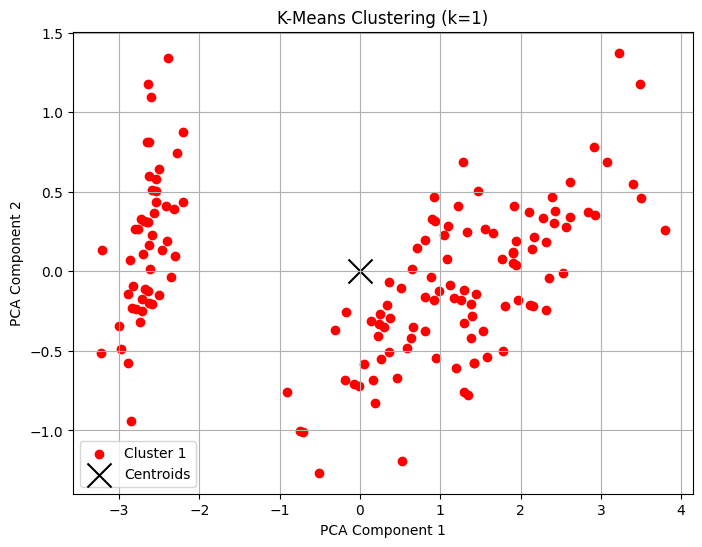

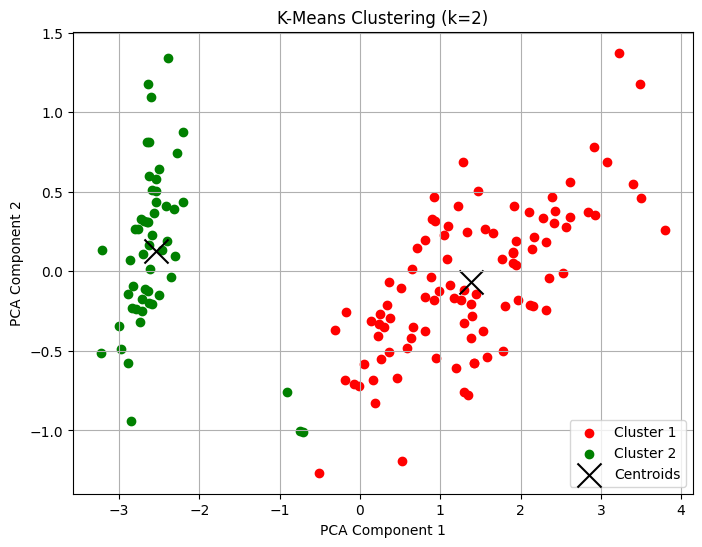

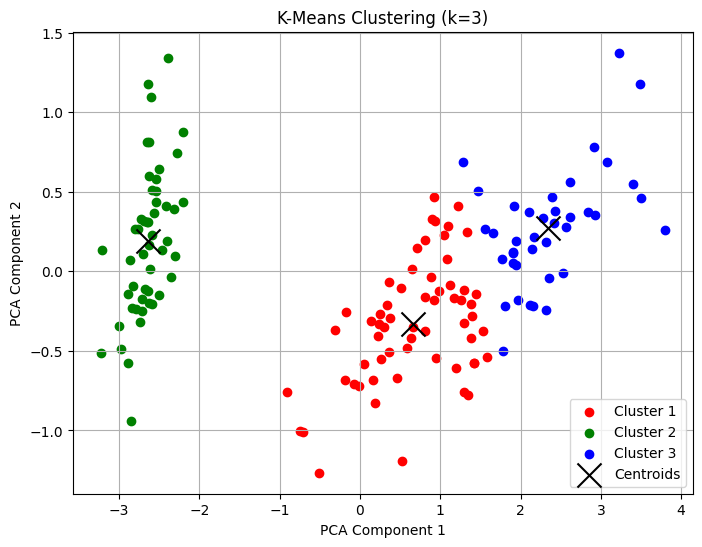

In [ ]:
# Function to calculate WCSS for a given k
def calculate_wcss(data, centroids, clusters):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = np.array(clusters[i])
        if cluster_points.size > 0:
            wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

# Step 1: Calculate WCSS for the Elbow Method
def elbow_method(data, max_k=10):
    wcss_values = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans_manual(data, k)
        wcss = calculate_wcss(data, centroids, clusters)
        wcss_values.append(wcss)
    return wcss_values

# Calculate WCSS for different values of k
max_k = 10
wcss_values = elbow_method(reduced_data, max_k)

# Step 2: Plot the Elbow Curve
plt.figure(figsize = (8, 6))
plt.plot(range(1, max_k + 1), wcss_values, marker = 'o', linestyle = '--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Step 3: Visualize Clusters for Different k Values
k_range = range(1, 4) # Test k = 1 to k = 3
for k in k_range:
    centroids, clusters = kmeans_manual(reduced_data, k)

    # Plot data points with their assigned clusters
    plt.figure(figsize = (8, 6))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # Add more colors if k > 7
    for i in range(k):
        cluster_points = np.array(clusters[i])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c = colors[i], label = f'Cluster {i + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c = 'black', marker = 'x', s = 300, label = 'Centroids')
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid()
    plt.show()